In [2]:
from beads import beads
import numpy as np
import matplotlib.pyplot as plt
from refractiveindex import RefractiveIndexMaterial

SiO2 = RefractiveIndexMaterial(shelf='main', book='SiO2', page='Franta-25C')
HfO2 = RefractiveIndexMaterial(shelf='main', book='HfO2', page='Franta')
Ag = RefractiveIndexMaterial(shelf='main', book='Ag', page='Ciesielski')
Si = RefractiveIndexMaterial(shelf='main', book='Si', page='Franta-25C')
Ti = RefractiveIndexMaterial(shelf='main', book='Ti', page='Werner')
Ti_2 = RefractiveIndexMaterial(shelf='main', book='Ti', page='Ordal')
SodaLime = RefractiveIndexMaterial(shelf='glass', book='soda-lime', page='Rubin-IR')

dev_structure = [
    ('air',0.0,'slab'),
    (SiO2,230,'slab'),
    (HfO2,485,'slab'),
    (SiO2,688,'slab'),
    (HfO2,13,'slab'),
    (SiO2,73,'slab'),
    (HfO2,34,'slab'),
    (SiO2,54,'slab'),
    (Ag,200,'slab'),
    (Ti_2,20,'slab'),
    (Si,750,'slab'),
    ('air',0.0,'slab')
]

wv_sweep = np.linspace(5000, 20000, num=10, endpoint=True) 

# dev_structure = [
#     ('air',0.0,'slab'), 
#     (SiO2,8000,'honeycomb'), 
#     (SodaLime,1000000,'slab'), 
#     ('air',0.0,'slab') 
# ]

theta 0


(0.0, 1.0)

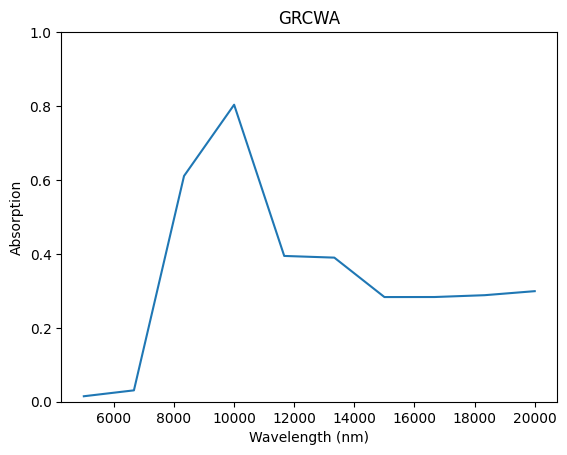

In [3]:
Rs, Ts, As = beads(wv_sweep, nG=10, theta_start=0, theta_end=80, n_theta=10, 
                   theta_sweep=False, Nx=1, Ny=1, Np=10, structure=dev_structure)

plt.plot(wv_sweep, As)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Absorption")
# plt.title("Honeycomb on Sodalime glass; nG=2; Nx=Ny=10; Np=10")
plt.title('GRCWA')
plt.ylim(0, 1)

In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from refractiveindex import RefractiveIndexMaterial

SiO2 = RefractiveIndexMaterial(shelf='main', book='SiO2', page='Franta-25C')
HfO2 = RefractiveIndexMaterial(shelf='main', book='HfO2', page='Franta')
Ag = RefractiveIndexMaterial(shelf='main', book='Ag', page='Ciesielski')
Si = RefractiveIndexMaterial(shelf='main', book='Si', page='Franta-25C')
Ti = RefractiveIndexMaterial(shelf='main', book='Ti', page='Werner')
Ti_2 = RefractiveIndexMaterial(shelf='main', book='Ti', page='Ordal')
SodaLime = RefractiveIndexMaterial(shelf='glass', book='soda-lime', page='Rubin-IR')

dev_structure = [
    # ('air',0.0,'slab'),
    (SiO2,230,'slab'),
    (HfO2,485,'slab'),
    (SiO2,688,'slab'),
    (HfO2,13,'slab'),
    (SiO2,73,'slab'),
    (HfO2,34,'slab'),
    (SiO2,54,'slab'),
    (Ag,200,'slab'),
    (Ti_2,20,'slab'),
    (Si,750,'slab'),
    # ('air',0.0,'slab')
]

wv_sweep = np.linspace(5000, 20000, num=10, endpoint=True)     # add small number to avoid singular matrix error
wv_sweep = torch.from_numpy(wv_sweep) 
from gpu_acceleration import gpu_acceleration

theta 0
freq 0
freq 1
freq 2
freq 3
freq 4
freq 5
freq 6
freq 7
freq 8
freq 9


Text(0.5, 1.0, 'TORCWA')

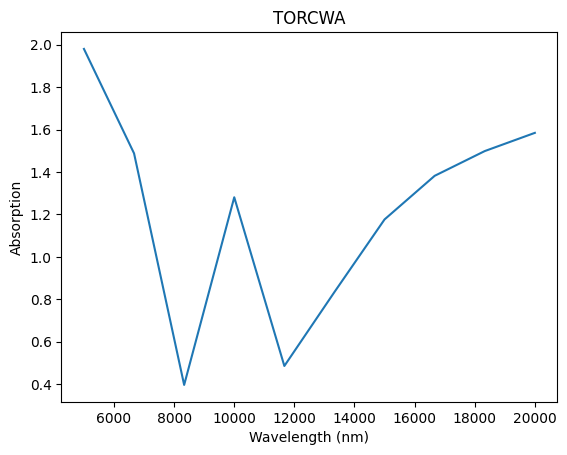

In [5]:
Rs, Ts, As = gpu_acceleration(wv_sweep, nG=10, theta_start=0, theta_end=80, n_theta=10, 
                   theta_sweep=False, Nx=1, Ny=1, Np=10, structure=dev_structure)

plt.plot(wv_sweep, As)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Absorption")
# plt.title("Honeycomb on Sodalime glass; nG=2; Nx=Ny=10; Np=10")
plt.title('TORCWA')
# plt.ylim(0, 1)

Text(0.5, 1.0, 'TORCWA')

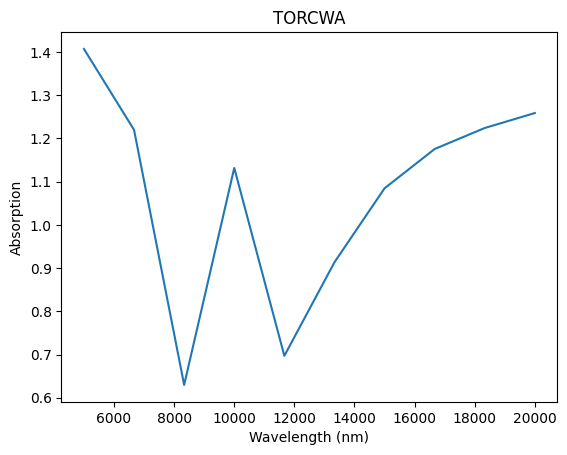

In [6]:
plt.plot(wv_sweep, torch.sqrt(As))
plt.xlabel("Wavelength (nm)")
plt.ylabel("Absorption")
# plt.title("Honeycomb on Sodalime glass; nG=2; Nx=Ny=10; Np=10")
plt.title('TORCWA')

Text(0.5, 1.0, 'TORCWA')

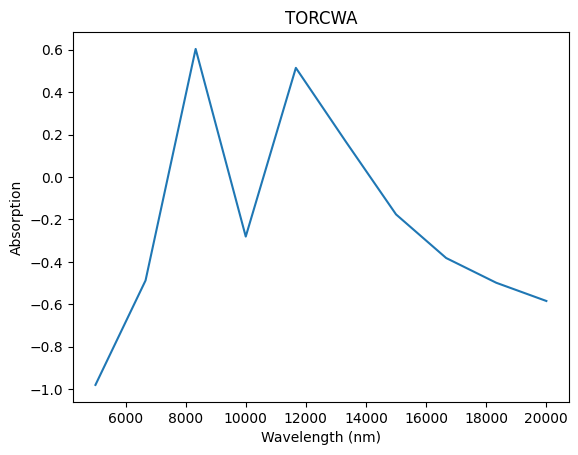

In [7]:
plt.plot(wv_sweep, Rs)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Absorption")
# plt.title("Honeycomb on Sodalime glass; nG=2; Nx=Ny=10; Np=10")
plt.title('TORCWA')